In [1]:
import math
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Stitching

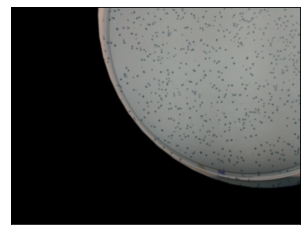

In [2]:
TL = cv2.imread("Plate Images/2019-07-16_15.40.51/Camera-3/4/image-00000.jpg")
TR = cv2.imread("Plate Images/2019-07-16_15.40.51/Camera-2/4/image-00000.jpg")
BL = cv2.imread("Plate Images/2019-07-16_15.40.51/Camera-1/4/image-00000.jpg")
BR = cv2.imread("Plate Images/2019-07-16_15.40.51/Camera-0/4/image-00000.jpg")
plt.imshow(BL, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [3]:
def showImages(images):
    count = 0
    for img in images:
        windowName = "img" + str(count)
        cv2.namedWindow(windowName, cv2.WINDOW_NORMAL)
        cv2.imshow(windowName,img)
        cv2.waitKey(0)
        count += 1
    cv2.destroyAllWindows()

# Binary Mask

In [9]:
plateImage = cv2.imread("Plate Images/image-00000.jpg",0)

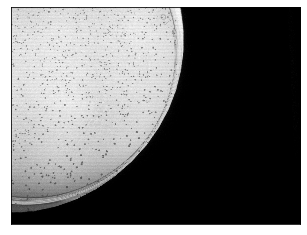

In [10]:
plt.imshow(plateImage, 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

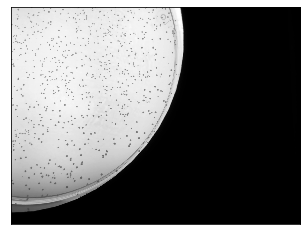

In [6]:
# Denoising the vertical black lines 
image = cv2.fastNlMeansDenoising(plateImage,None,10,7,21)
plt.imshow(image, 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [7]:
titles = ['Original Image', 'Noise Reuction']
images = [plateImage, image]
showImages(images)

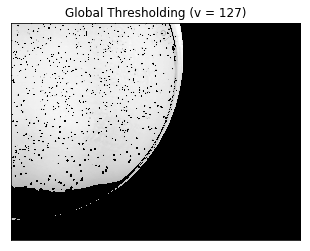

In [11]:
ret,th1 = cv2.threshold(image,127,255,cv2.THRESH_TOZERO)
plt.imshow(th1, 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.title("Global Thresholding (v = 127)")
plt.show()

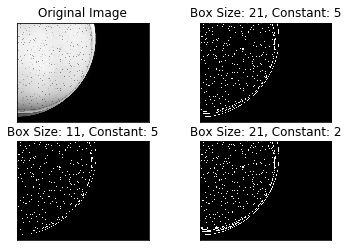

In [13]:
b1 = 21; c1 =5; 
b2 = 11; c2 = 5; 
b3 = 21; c3 = 2; 
adapMean1 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,b1, c1)
adapMean2 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,b2, c2)
adapMean3 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,b3, c3) 

titles = ['Original Image', 'Box Size: ' + str(b1) + ', Constant: ' + str(c1),
            'Box Size: ' + str(b2) + ', Constant: ' + str(c2), 'Box Size: ' + str(b3) + ', Constant: ' + str(c3)]
images = [image, adapMean1, adapMean2, adapMean3]

showImages(images)

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

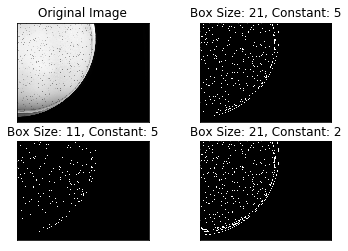

In [16]:
b1 = 21; c1 = 5; 
b2 = 11; c2 = 5; 
b3 = 21; c3 = 2; 
adapGauss1 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,b1, c1)
adapGauss2 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,b2, c2)
adapGauss3 = cv2.adaptiveThreshold(image,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, b3, c3) 

titles = ['Original Image', 'Box Size: ' + str(b1) + ', Constant: ' + str(c1),
            'Box Size: ' + str(b2) + ', Constant: ' + str(c2), 'Box Size: ' + str(b3) + ', Constant: ' + str(c3)]
images = [image, adapGauss1, adapGauss2, adapGauss3]

showImages(images)

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [14]:
# global thresholding
ret1,th1 = cv2.threshold(image,127,255,cv2.THRESH_BINARY)

# Otsu's thresholding
ret2,th2 = cv2.threshold(image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(ret1)
print(ret2)
print(ret3)

127.0
76.0
76.0


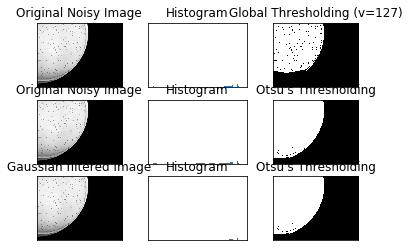

In [15]:
# plot all the images and their histograms
imgs = [image,th1, th2, th3]
images = [image, 0, th1,
          image, 0, th2,
          image, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]

showImages(imgs)
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [18]:
showImages([adapGauss3])

# Blob Detection

In [17]:
# Setup SimpleBlobDetector parameters.
params0 = cv2.SimpleBlobDetector_Params()
params0.filterByColor = True
params0.blobColor = 255

params1 = cv2.SimpleBlobDetector_Params()
params1.filterByColor = True
params1.blobColor = 255
params1.filterByInertia = True
params1.minInertiaRatio = 0.01
params1.filterByConvexity = True
params1.minConvexity = 0.01

params2 = cv2.SimpleBlobDetector_Params()
params2.filterByColor = True
params2.blobColor = 255
params2.filterByInertia = True
params2.minInertiaRatio = 0.01
params2.filterByConvexity = True
params2.minConvexity = 0.9

paramList = [params0, params1, params2]
detectorList = []

is_v2 = cv2.__version__.startswith("2.")
if is_v2:
    for params in paramList:        
        detector = cv2.SimpleBlobDetector(params)
        detectorList.append(detector)
else:
    for params in paramList:        
        detector = cv2.SimpleBlobDetector_create(params)
        detectorList.append(detector)

In [18]:
keypointImages = []
for detector in detectorList:
    keypoints = detector.detect(adapGauss3)
    print(len(keypoints))
    # Draw detected blobs as red circles.
    # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
    binaryKeypoints = cv2.drawKeypoints(adapGauss3, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    originalKeypoints = cv2.drawKeypoints(image, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    keypointImages.append(binaryKeypoints)
    keypointImages.append(originalKeypoints)
showImages(keypointImages)

640
757
712


# Dark Area Approach

## Segmentation

In [13]:
def dist(p1, p2):
    return math.sqrt((p2[0] -  p1[0])**2 + (p2[1] - p1[1])**2)

In [14]:
class Blob:
    def __init__(self, coord, whitePix, darkPix):
        self.coord = coord
        self.whitePix = whitePix
        self.darkPix = darkPix

In [19]:
R = 32
phi = 0.1
keyPoints = detectorList[2].detect(adapGauss3)
width = len(adapGauss3)
height = len(adapGauss3[0])
blobList = []
for keyPoint in keyPoints:
    # Obtaining the x,y pixel coordinates of the blob
    x = (int) (keyPoint.pt[0])
    y = (int) (keyPoint.pt[1])
    coord = [x, y]
    # Starting x and y coordinates for the segmented box
    lowX = x - R
    lowY = y - R
    
    # discarding blobs too close to window boundaries
    if lowX < 0 or lowY < 0 or lowX + 2*R > width or lowY + 2*R > height: 
        continue 
    r = (int) (keyPoint.size * (1+phi))/2
    # dark percentage inside = darkCount/insideCount
    # white percentage outside = whiteCOunt/outsideCount
    insideCount = 0
    outsideCount = 0
    whiteCount = 0
    darkCount = 0
    for i in range(lowX, lowX + 2*R):
        for j in range (lowY, lowY + 2*R):
            # Do not count pixels that are outside larger circle
            if dist([x,y], [i,j]) >= R:
                continue
            # Check for dark pixels inside blob
            elif dist([x,y], [i,j]) <= r: 
                insideCount += 1
                if adapGauss3[j, i] == 0:
                    darkCount += 1
            # Check for white pixels outside blob
            else:
                outsideCount += 1
                if adapGauss3[j, i] == 255: 
                    whiteCount += 1
    whitePix = whiteCount*100/outsideCount
    darkPix = darkCount*100/insideCount
    blobList.append(Blob(coord, whitePix, darkPix))
        
print(len(blobList))

679


## Analysis

In [28]:
# Ranking for worst single colonies
whiteRank = sorted(blobList, key=lambda x: x.whitePix, reverse = True)
# Ranking for worst separation from neighbors
darkRank = sorted(blobList, key=lambda x: x.darkPix, reverse = True)

In [27]:
# Worst single colonies
# for i in range(10):
#     print(f"WhitePix: {darkRank[i].whitePix} DarkPix: {darkRank[i].darkPix}")
segList = []
imgList = []
for blob in darkRank:
    if blob.darkPix > 16:
        lowX = blob.coord[0] - 32
        lowY = blob.coord[1] - 32
        segment = keypointImages[2][lowY: lowY + 64, lowX: lowX + 64]
        segList.append(segment)
        print(f"WhitePix: {blob.whitePix} DarkPix: {blob.darkPix}")
showImages(segList)
# print(len(segList))

WhitePix: 25.79719387755102 DarkPix: 42.028985507246375
WhitePix: 25.573979591836736 DarkPix: 40.57971014492754
WhitePix: 18.314321926489228 DarkPix: 38.775510204081634
WhitePix: 8.033240997229917 DarkPix: 32.49211356466877
WhitePix: 8.053221288515406 DarkPix: 31.80515759312321
WhitePix: 2.9813218390804597 DarkPix: 26.60332541567696
WhitePix: 6.073825503355705 DarkPix: 24.444444444444443
WhitePix: 0.9342301943198804 DarkPix: 24.00756143667297
WhitePix: 0.9958791208791209 DarkPix: 21.160409556313994
WhitePix: 11.212737127371273 DarkPix: 19.76284584980237
WhitePix: 0.7211538461538461 DarkPix: 19.112627986348123
WhitePix: 0.31887755102040816 DarkPix: 18.840579710144926
WhitePix: 0.7002801120448179 DarkPix: 18.624641833810887
WhitePix: 0.44814340588988477 DarkPix: 18.51851851851852
WhitePix: 0.7554945054945055 DarkPix: 18.088737201365188
WhitePix: 0.948509485094851 DarkPix: 17.786561264822133
WhitePix: 0.9395973154362416 DarkPix: 17.77777777777778
WhitePix: 0.8585164835164835 DarkPix: 17.0

In [39]:
# Worst separated colonies
# for i in range(10):
#     print(f"WhitePix: {whiteRank[i].whitePix} DarkPix: {whiteRank[i].darkPix}")
segList = []
imgList = []
for blob in whiteRank:
    if blob.whitePix < 2.792553 and blob.whitePix > 2:
        lowX = blob.coord[0] - 32
        lowY = blob.coord[1] - 32
        segment = keypointImages[2][lowY: lowY + 64, lowX: lowX + 64]
        segList.append(segment)
showImages(segList)
# print(len(segList))

In [49]:
whitePixData = [blob.whitePix for blob in blobList]
darkPixData = [blob.darkPix for blob in blobList]

In [27]:
whiteDF = pd.DataFrame(whitePixData)
whiteDF.describe()

,0
count,679.000000
mean,4.722074
std,5.259219
min,0.097784
25%,0.585246
50%,2.792553
75%,7.374710
max,34.109043


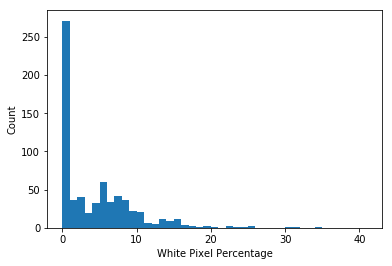

In [28]:
plt.hist(whitePixData,41,[0,41]) 
plt.xlabel("White Pixel Percentage")
plt.ylabel("Count")
plt.show()

In [29]:
darkDF = pd.DataFrame(darkPixData)
darkDF.describe()

,0
count,679.000000
mean,9.556733
std,4.325577
min,0.000000
25%,7.106599
50%,9.395973
75%,11.673526
max,42.028986


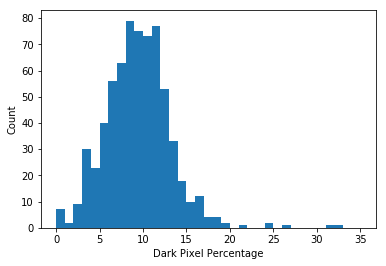

In [30]:
plt.hist(darkPixData,35,[0,35]) 
plt.xlabel("Dark Pixel Percentage")
plt.ylabel("Count")
plt.show()

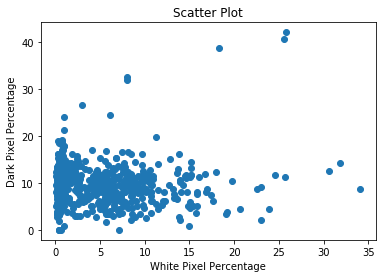

In [51]:
plt.scatter(whitePixData, darkPixData)
plt.title('Scatter Plot')
plt.xlabel('White Pixel Percentage')
plt.ylabel('Dark Pixel Percentage')
plt.show()

## Scaling 

In [31]:
# Waiting for stiched image to be aligned 

## Exporting

In [32]:
coordExport = pd.DataFrame(coordList, columns=["X", "Y"])
coordExport.to_csv (r'locations.csv', index = None, header= False)

NameError: name 'coordList' is not defined

In [ ]:
coordExport.head()